In [27]:
from preparing_script import agrofiz_plot, SVD_vis, Kvu, ob_ves_plot, eroz_vis
import pandas as pd 
import numpy as np 
import scipy 
from scipy.stats import f_oneway as ANOVA

import seaborn as sns 
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
agrofiz = pd.read_csv('data/Агрофизика все объекты.csv')
agrofiz.head(10)

,region,Год,Тип обработки,GPS №,"СВД, мм","СВД агроном. цен., мм","Эрозионно опасные (<1 мм), %",повторность,"СВД водоустойчивые 10-7, мм","СВД водоустойчивые 5-3, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые >10, мм","Эрозионно опасные 10-7 (<1 мм), %","Эрозионно опасные 5-3 (<1 мм), %","Эрозионно опасные 7-5 (<1 мм), %","Эрозионно опасные >10 (<1 мм), %"
0,Курск,2019,ПП,__,9.106996,1.460856,2.861062,1,1.349375,0.854937,1.147437,0.950000,75.30,80.75,70.55,76.60
1,Курск,2019,ПП,__,8.386025,1.532257,6.685393,2,2.030312,0.872875,1.215250,2.726813,61.45,78.90,69.60,60.85
2,Курск,2019,ПП,__,8.300786,1.915038,2.691599,3,3.213000,1.106500,1.519563,2.745750,16.60,69.20,62.25,49.00
3,Курск,2019,ПП,__,9.825944,1.119489,2.838208,4,2.202875,0.886250,1.341687,6.431375,59.70,81.80,67.15,41.10
4,Курск,2019,ПП,__,8.849472,1.716434,1.738650,5,1.791562,0.800313,1.141625,3.687813,63.65,80.65,72.10,50.45
5,Курск,2019,ТТ,__,9.826951,1.061199,3.869919,1,2.411312,1.029688,1.635375,4.972812,51.45,74.75,58.10,48.05
6,Курск,2019,ТТ,__,6.609721,2.027766,5.425074,2,1.606812,1.162875,1.255813,2.429000,65.65,65.90,70.05,70.40
7,Курск,2019,ТТ,__,10.358241,0.866819,2.561705,3,3.214500,0.905375,1.502250,8.581500,49.80,76.10,64.20,19.60
8,Курск,2019,ТТ,__,8.622014,1.540706,2.405383,4,2.759813,1.192813,1.766063,4.915313,55.05,71.45,56.25,36.45
9,Курск,2019,ТТ,__,7.898253,1.710809,2.438143,5,3.397750,1.076938,1.722437,5.246750,51.60,66.75,59.35,49.80


## Урожайное 2022 год точки XX/XVIII

In [9]:
agrofiz_urozaynoe_2022 = agrofiz[
    (agrofiz["region"] == 'урожайное') & 
    (agrofiz["Год"] == 2022) &
    agrofiz['GPS №'].isin(['XX', 'XVIII'])
    ]

### СВД

F_onewayResult(statistic=0.1963277921034889, pvalue=0.6694385252159205)


СВД, мм                    
                   mean       std       sem
Тип обработки                              
ПП             9.170809  0.967291  0.432586
ТТ             9.527056  1.515418  0.677715

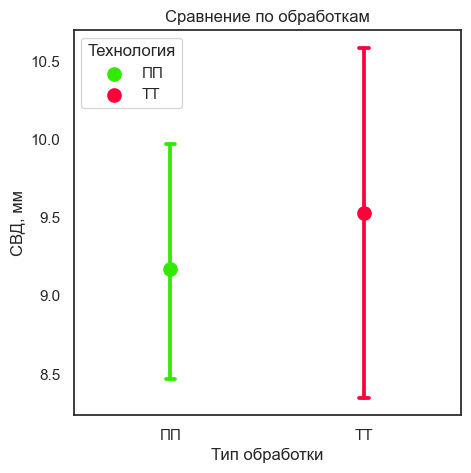

In [14]:
stats, aov, fig = agrofiz_plot(agrofiz_urozaynoe_2022, 'СВД, мм')
print(aov)
stats

### СВД агроном. цен., мм

F_onewayResult(statistic=0.7099863002014082, pvalue=0.423921868645741)


СВД агроном. цен., мм                    
                               mean       std       sem
Тип обработки                                          
ПП                         1.712804  0.415520  0.185826
ТТ                         1.406118  0.699802  0.312961

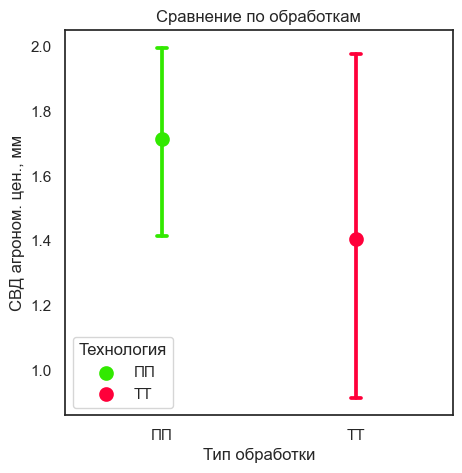

In [16]:
stats, aov, fig = agrofiz_plot(agrofiz_urozaynoe_2022, 'СВД агроном. цен., мм')
print(aov)
stats

### Эрозионно опасные (<1 мм), %

F_onewayResult(statistic=2.3202550396555517, pvalue=0.16620089358039822)


Эрозионно опасные (<1 мм), %                    
                                      mean       std       sem
Тип обработки                                                 
ПП                                3.589891  0.650090  0.290729
ТТ                                5.421033  2.608267  1.166453

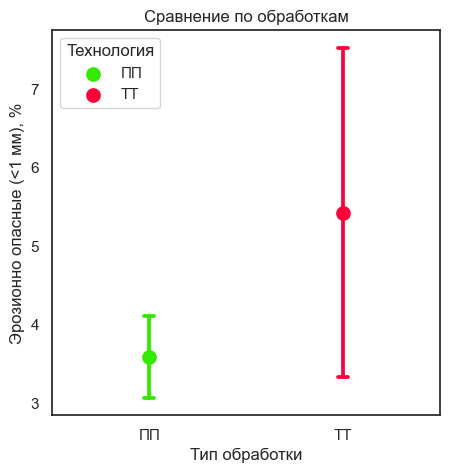

In [17]:
stats, aov, fig = agrofiz_plot(agrofiz_urozaynoe_2022, 'Эрозионно опасные (<1 мм), %')
print(aov)
stats

## СВД водопрочных агрегатов

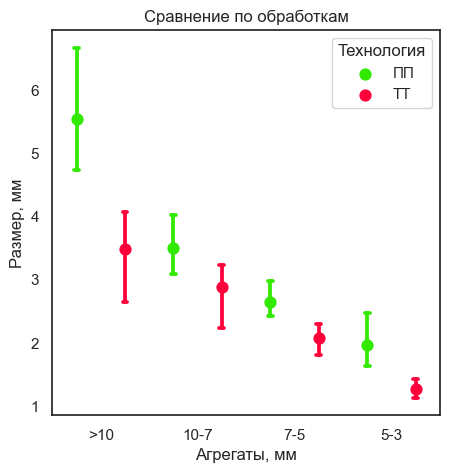

                      агрегаты     P-val
0   СВД водоустойчивые >10, мм  0.045785
1  СВД водоустойчивые 10-7, мм  0.226157
2   СВД водоустойчивые 7-5, мм  0.063371
3   СВД водоустойчивые 5-3, мм  0.064797


СВД водоустойчивые >10, мм                      \
                                    mean       std       sem   
Тип обработки                                                  
ПП                              5.546398  1.003765  0.579524   
ТТ                              3.483335  0.741688  0.428214   

              СВД водоустойчивые 10-7, мм                      \
                                     mean       std       sem   
Тип обработки                                                   
ПП                               3.498602  0.483326  0.279049   
ТТ                               2.887248  0.561545  0.324208   

              СВД водоустойчивые 7-5, мм                      \
                                    mean       std       sem   
Тип обработки                                                  
ПП                              2.641435  0.293885  0.169675   
ТТ                              2.075554  0.247957  0.143158   

              СВД водоустойчивые 5-3, мм                      
                                    mean       std       sem  
Тип обработки                                                 
ПП                              1.966648  0.452748  0.261394  
ТТ                              1.271102  0.148677  0.085839

In [23]:
stats, aov, fig = SVD_vis(agrofiz_urozaynoe_2022)
print(aov)
stats

### Содержание эрозионно опасных агрегатов (<1 мм)

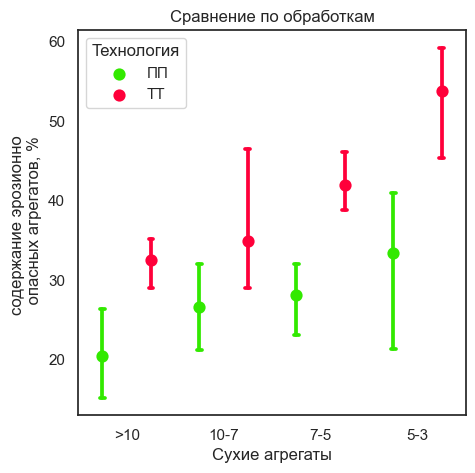

                            агрегаты     P-val
0   Эрозионно опасные >10 (<1 мм), %  0.030891
1  Эрозионно опасные 10-7 (<1 мм), %  0.281035
2   Эрозионно опасные 7-5 (<1 мм), %  0.015814
3   Эрозионно опасные 5-3 (<1 мм), %  0.052848


Эрозионно опасные >10 (<1 мм), %                      \
                                          mean       std       sem   
Тип обработки                                                        
ПП                                   20.425000  5.584642  3.224294   
ТТ                                   32.528333  3.162168  1.825679   

              Эрозионно опасные 10-7 (<1 мм), %                       \
                                           mean        std       sem   
Тип обработки                                                          
ПП                                    26.641667   5.432500  3.136455   
ТТ                                    34.858333  10.056014  5.805842   

              Эрозионно опасные 7-5 (<1 мм), %                      \
                                          mean       std       sem   
Тип обработки                                                        
ПП                                   28.175000  4.567776  2.637207   
ТТ                                   41.943333  3.776130  2.180150   

              Эрозионно опасные 5-3 (<1 мм), %                       
                                          mean        std       sem  
Тип обработки                                                        
ПП                                      33.465  10.636916  6.141226  
ТТ                                      53.835   7.402427  4.273793

In [30]:
stats, aov, fig = eroz_vis(agrofiz_urozaynoe_2022)
print(aov)
stats

## Курск

## Архангельский